In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [2]:
ds1 = pd.read_csv("Data/movies_metadata.csv")
ds1.head()

/Users/waynsday/miniconda3/envs/UPDEDA/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [34]:
ds1.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

### Revenue vs Vote Average

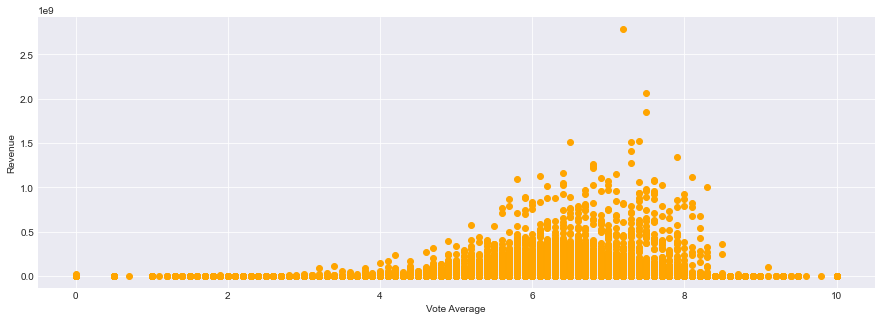

In [40]:
plt.style.use('seaborn-dark')
pd.plotting.register_matplotlib_converters()
fig1 = plt.figure(figsize=(15, 5))
ax = fig1.add_subplot(111)
plt.scatter(ds1['vote_average'], ds1['revenue'], color = 'orange')
ax.grid(True)

plt.xlabel('Vote Average')
plt.ylabel('Revenue')


rev_vote = ds1[['vote_average', 'revenue']]
rev_vote.to_csv('Data/Revenue_Vote.csv')
rev_vote.to_csv('Revenue_Vote.csv')
plt.savefig('Graphs/Revenue_Vote.png')
plt.savefig('Revenue_Vote.png')

In [47]:
ds1['vote_average'].corr(ds1['revenue']), ds1['revenue'].corr(ds1['vote_average'])

(0.08386784194079165, 0.08386784194079165)

Very little positive correlation

### Budget vs Vote Average

In [41]:
indexNames = ds1[ds1['budget'].str.isdigit() == False].index
budgetdf = ds1.drop(indexNames)
budgetdf['budget']= budgetdf['budget'].astype(float)

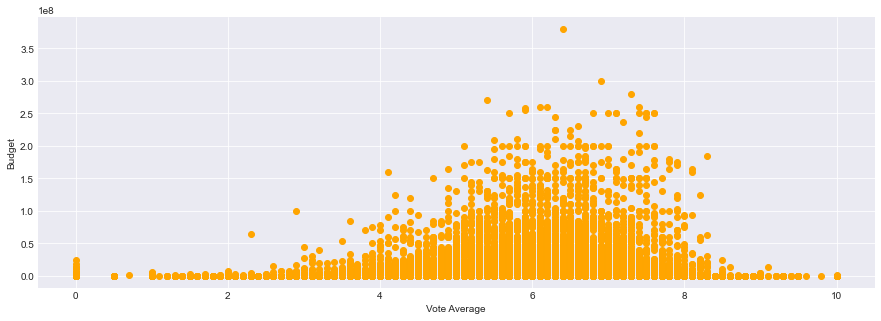

In [42]:
plt.style.use('seaborn-dark')
pd.plotting.register_matplotlib_converters()
fig1 = plt.figure(figsize=(15, 5))
ax = fig1.add_subplot(111)
plt.scatter(budgetdf['vote_average'], budgetdf['budget'], color = 'orange')
ax.grid(True)

plt.xlabel('Vote Average')
plt.ylabel('Budget')


rev_vote = budgetdf[['vote_average','budget']]
rev_vote.to_csv('Data/Budget_Vote.csv')
rev_vote.to_csv('Budget_Vote.csv')
plt.savefig('Graphs/Budget_Vote.png')
plt.savefig('Budget_Vote.png')

In [48]:
budgetdf['vote_average'].corr(budgetdf['budget']), budgetdf['revenue'].corr(budgetdf['vote_average'])

(0.07349433580263218, 0.08386784194079165)

Very little positive correlation

### Budget vs Revenue

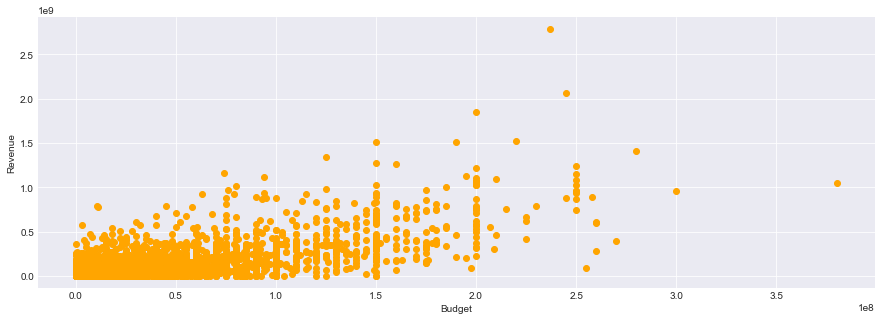

In [44]:
plt.style.use('seaborn-dark')
pd.plotting.register_matplotlib_converters()
fig1 = plt.figure(figsize=(15, 5))
ax = fig1.add_subplot(111)
plt.scatter(budgetdf['budget'], budgetdf['revenue'], color = 'orange')
ax.grid(True)

plt.xlabel('Budget')
plt.ylabel('Revenue')


rev_vote = budgetdf[['budget', 'revenue']]
rev_vote.to_csv('Data/Revenue_Budget.csv')
rev_vote.to_csv('Revenue_Budget.csv')
plt.savefig('Graphs/Revenue_Budget.png')
plt.savefig('Revenue_Budget.png')

In [50]:
budgetdf['revenue'].corr(budgetdf['budget']), budgetdf['revenue'].corr(budgetdf['budget'])

(0.7687758447446277, 0.7687758447446277)

Strong positive correlation